In [2]:
# importing necessary libraries

import numpy as np
import pandas as pd

#importing Graph plotting libraries

import matplotlib.pyplot as plt 

In [3]:
# importing make classification dataset
from sklearn.datasets import make_classification

In [4]:
# Splitting dataset into independent and dependent variables 
#here n_samples = no of samples you want to import ; n_features = no of columns or features 
#n_informative(default=2) : The number of informative features ;
#n_redundant (default=2): The number of redundant features.These features are generated as random linear combinations of the informative features.
#n_classes (default=2):The number of classes (or labels) of the classification problem.
#n_clusters_per_class (default=2) : The number of clusters per class.


X,y = make_classification(n_samples = 100 , n_features = 2  , n_informative = 1 ,n_redundant = 0 ,n_classes=2 ,
                         n_clusters_per_class=1,random_state=41, hypercube=False , class_sep=10)

In [5]:
#according to W1x1 + w2x2 + B ,here X is giving value of w1 and w2 

X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [6]:
#As y has only 1 and 0 it is a classification problem.
y 

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

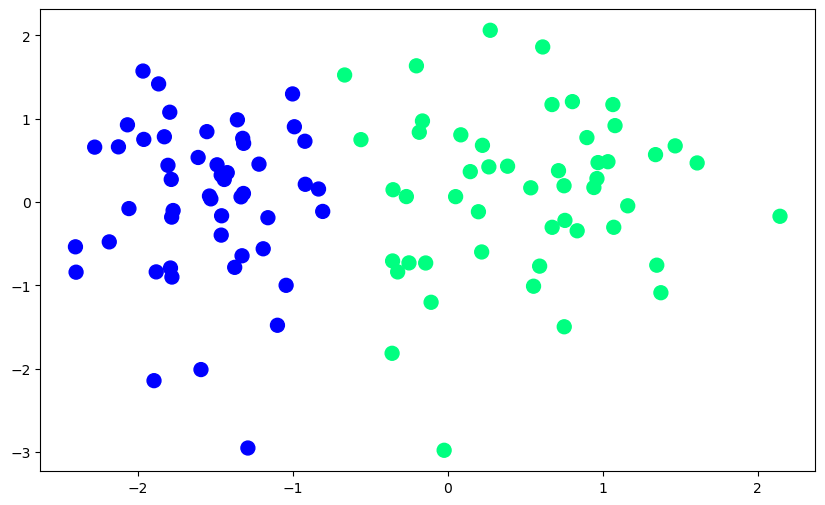

In [7]:
#Plotting scatter plot 

plt.figure(figsize=(10,6))
plt.scatter(X[:,0] ,X[:,1] , c=y ,cmap='winter' ,s=100)

#In scatter plot blue is 0 and green in 1 value of target column(y)

In [8]:
# function for calculating the weights W1, W2 , B for W1X1+W2X2+B. 

def perceptron(X,y):
    
    #Adding 1 in X  for bias or intercept because as of now we have only W1 and W2 in X (refer line 4)
    # np.insert will insert in variable X  , 0 =position /index and 1 = value , axis = 1 
    X = np.insert(X,0,1,axis=1)
    #Creating an array before this function shape of array is 2 columns and after adding intercept it's 3 .
    #So it will create array like[1,1,1] of w0 ,w1 and b
    weights = np.ones(X.shape[1])
    #learning rate
    lr = 0.1
    
    for i in range(1000):
        # here we took 0 to 100 because shape of X is 100,3
        j = np.random.randint(0,100)
        #predicting here by doint dot product of X[j] and weights
        #suppose j = 41 and value of X[J]=[1,0.2999 ,0.33] and weights =[1,1,1] 
        # after doing dot product value of z comes +ve 
        #acording to theory if z>=0 student will get placed else not !
        #then we will dot product value or z value in step() and store it to y_hat.As value is +ve step function will give 1 in y_hat
        y_hat = step(np.dot(X[j],weights))
        #updating the value of weights so in actual y[j] = 0 and y_hat =1 
        weights = weights+lr*(y[j]-y_hat)*X[j]
        #that's how we will calculate it 1000 times until line divides data into two halves or classes (i.e.0 ,1)
        
    return weights[0],weights[1:]
        
        
   #weights[0] = bias ; weights[1:] = weights

    

In [9]:
def step(z):
    return 1 if z >= 0 else 0
        

In [10]:
intercept_ , coef_ = perceptron(X,y)

In [11]:
print(intercept_)

0.9


In [12]:
print(coef_)

[1.3998907  0.03550225]


#### PLOTTING OF PERCEPTRON

In [13]:
#For that we will find mx+c that means ,We know Ax+Bx+C is somewhere equals to y= mx+ C . 
#So here m = A/B , coef_ has two values A, B 
# C = C/B intercept has value of c

In [14]:
m = -(coef_[0]/coef_[1])

In [15]:
c = -(intercept_/coef_[1])

In [16]:
m

39.43104536232857

In [17]:
c

25.350508221615218

In [19]:
x_input = np.linspace(-3 , 3 ,100)
x_input

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [20]:
y_input = m*x_input+c
y_input

array([-92.94262787, -90.55286754, -88.16310722, -85.77334689,
       -83.38358657, -80.99382624, -78.60406592, -76.21430559,
       -73.82454527, -71.43478494, -69.04502462, -66.65526429,
       -64.26550397, -61.87574364, -59.48598332, -57.09622299,
       -54.70646267, -52.31670234, -49.92694202, -47.53718169,
       -45.14742137, -42.75766104, -40.36790072, -37.97814039,
       -35.58838007, -33.19861974, -30.80885942, -28.41909909,
       -26.02933877, -23.63957844, -21.24981812, -18.86005779,
       -16.47029747, -14.08053714, -11.69077682,  -9.30101649,
        -6.91125617,  -4.52149584,  -2.13173552,   0.25802481,
         2.64778513,   5.03754546,   7.42730578,   9.81706611,
        12.20682643,  14.59658676,  16.98634708,  19.37610741,
        21.76586773,  24.15562806,  26.54538838,  28.93514871,
        31.32490903,  33.71466936,  36.10442968,  38.49419001,
        40.88395033,  43.27371066,  45.66347098,  48.05323131,
        50.44299163,  52.83275196,  55.22251228,  57.61

(-3.0, 2.0)

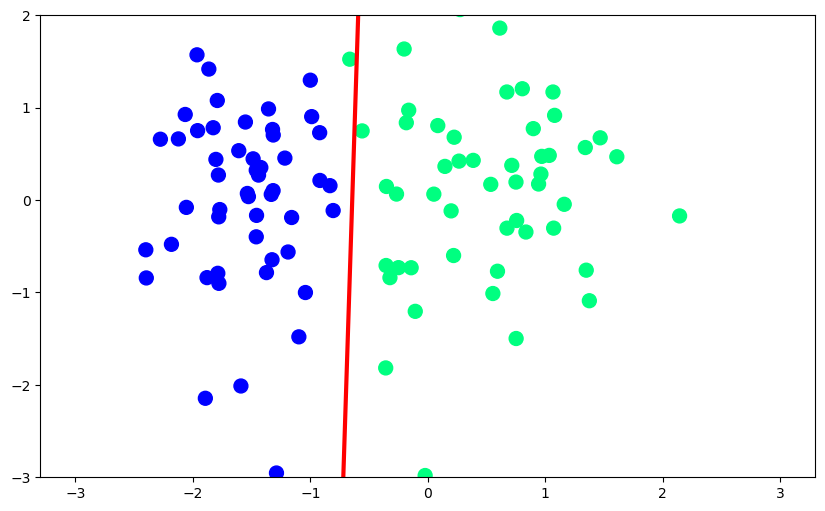

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x_input ,y_input , color ='red' , linewidth = 3)
plt.scatter(X[:, 0] , X[:, 1] , c=y , cmap = 'winter' , s=100)
plt.ylim(-3,2)

In [ ]:
Thank you !